# EPS 109 "Computer Simulations in Earth and Planetary Science"
### Instructor: Burkhard Militzer
### Combined lab and homework assignment 3: part 1

Create a new folder on your computer for this assignment. From bCourses, download your personal data set, the solutions files 'x_positions_2025.txt' with the exact positions, and everyone's data sets stored in 'submissions_2025.zip'




In [85]:
#Load the usual NumPy and MatPlotLib packages but also 'glob' so that we can read many files more easily.
import matplotlib.pyplot as plt
import numpy as np
import glob
%config InlineBackend.figure_format = 'retina'

With the command np.loadtxt(...), load the solution file and your dataset. If you do not have your personal dataset for some reason, you are free to work with someone else guesses but please note this clearly in your homework submission.

Store the length of the datasets in the variable 'nNumbers'. We know the number is 100 but Jupyter does not. Use this variable whenever it is needed later. Plot your data set and the solutions in one diagram. The x axis should be the index of the 100 positions. Add a labels and legend with 'plt.legend()'. Insert a comment how well your dataset agrees with the solution. 

In [86]:
import os
import random

folder_path = "/Users/simoncha/Desktop/school/EPS 109/hw/hw3/submissions_2025"

txt_files = [f for f in os.listdir(folder_path) if f.endswith(".txt")]

all_files = []
for f in txt_files:
    with open(os.path.join(folder_path, f), "r") as file:
        lines = [line.strip() for line in file.readlines()]
        all_files.append(lines)

result = []
for i in range(100):  # for each index
    chosen_file = random.choice(all_files)
    result.append(chosen_file[i])

output_path = os.path.join(folder_path, "combined_random.txt")
with open(output_path, "w") as out:
    out.write("\n".join(result))

print(f"New file created at {output_path}")

New file created at /Users/simoncha/Desktop/school/EPS 109/hw/hw3/submissions_2025/combined_random.txt


I want to preface by saying that my original data wasn’t great, but I wanted the new dataset to feel as natural as possible. To build it, I used our class submissions: for each index in a length-100 array, I randomly selected one student’s submission and took their value at that position. In other words, my combined_random.txt file is made up of 100 “lucky picks” (with replacement) drawn from the class. It’s not an exact copy of any single person’s work, but rather a distribution of the overall skill.

In [87]:
mydata = np.loadtxt('/Users/simoncha/Desktop/school/EPS 109/hw/hw3/combined_random.txt')
solutions = np.loadtxt('/Users/simoncha/Desktop/school/EPS 109/hw/hw3/x_positions_2025.txt')
nNumbers = len(mydata)

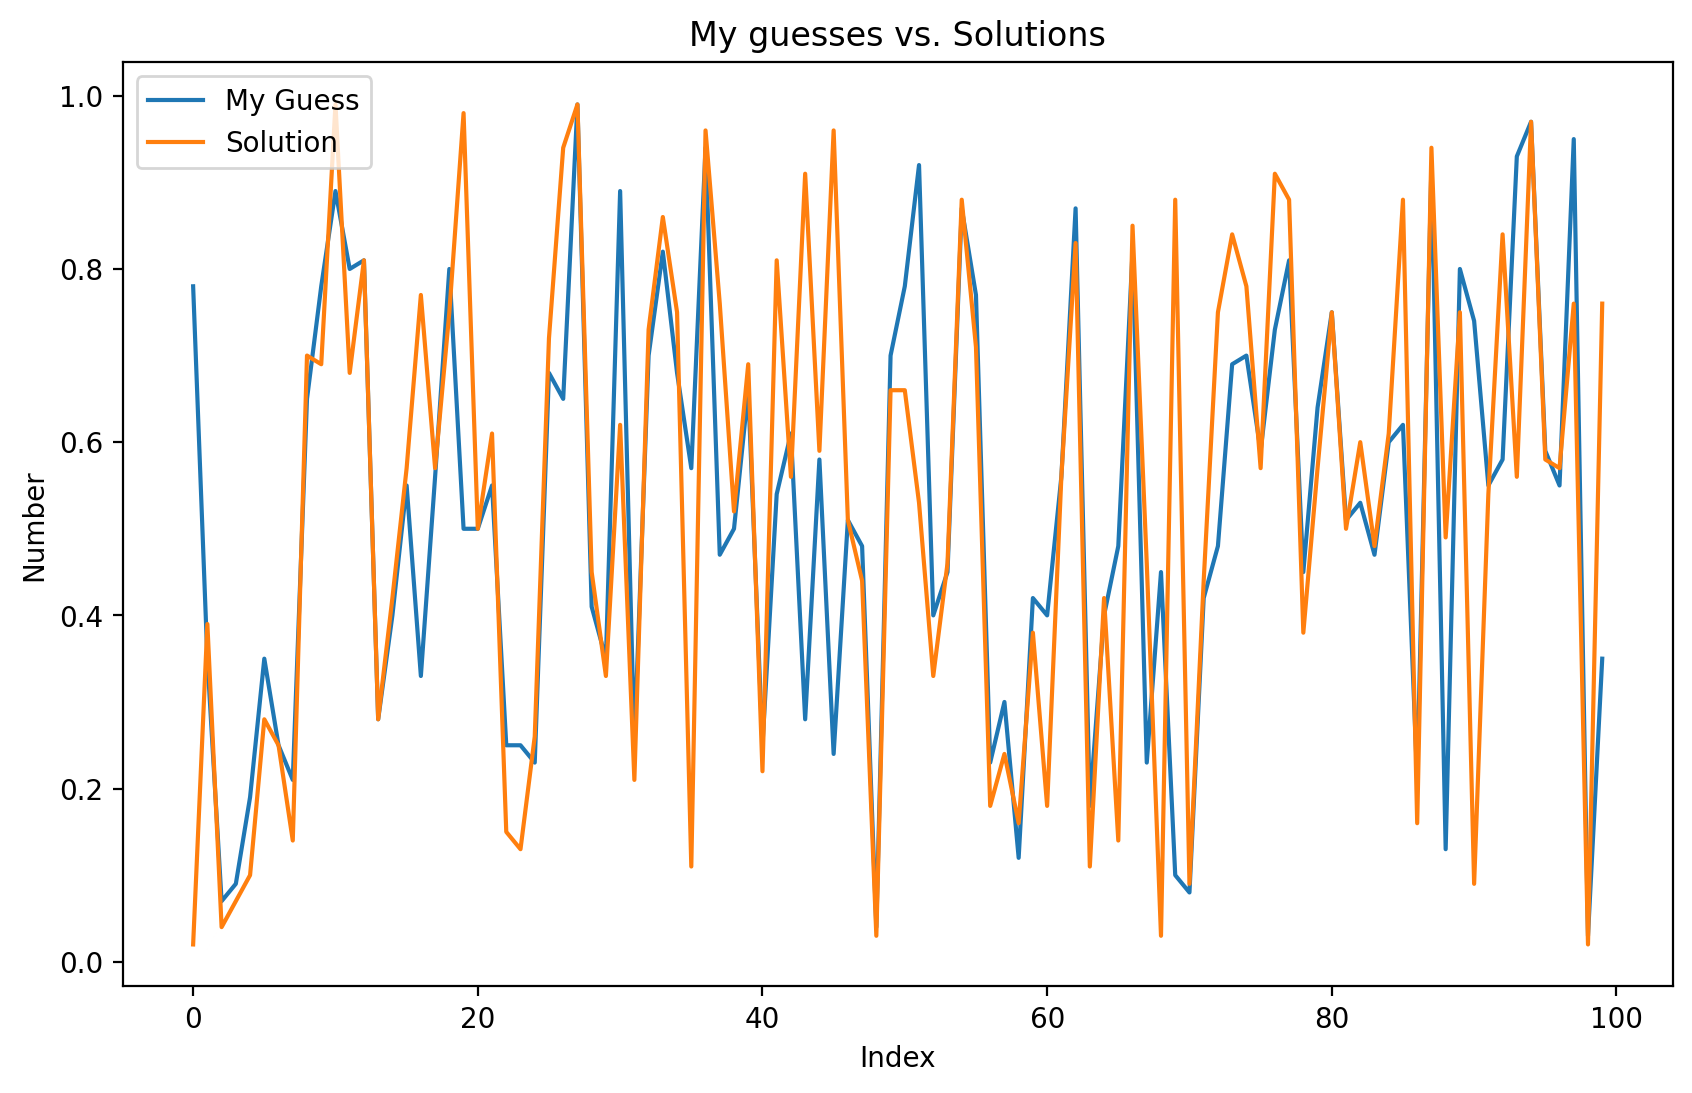

In [88]:
x = np.array(range(nNumbers))

plt.figure(figsize=(10, 6)) 
plt.plot(x, mydata, label='My Guess')
plt.plot(x, solutions, label='Solution')
plt.xlabel('Index')
plt.ylabel('Number')
plt.title('My guesses vs. Solutions')
plt.legend()
plt.show()


In [89]:
# Assuming that a guess that is within += 0.1 is correct, then the accuracy is as follows
correct = 0

for i in range(nNumbers):
    if (np.abs(mydata[i] - solutions[i]) <= 0.1):
        correct += 1

print(f"Percentage within 0.1: {correct / nNumbers}")

Percentage within 0.1: 0.71


My accuracy metric was saying if my score was within 0.1 of the solution. Compared to this, we did well with a score of 71%. If we ranodmly guessed each one, we would get a score on average of 19%. This is a significant improvement.

Now we plot both data sets in a different way. Make a XY scatter plot (no lines) where Y points are your guesses and the X points are the solutions. Explain how should this plot should look if you had guessed very accurately. Does your plot look ideal?

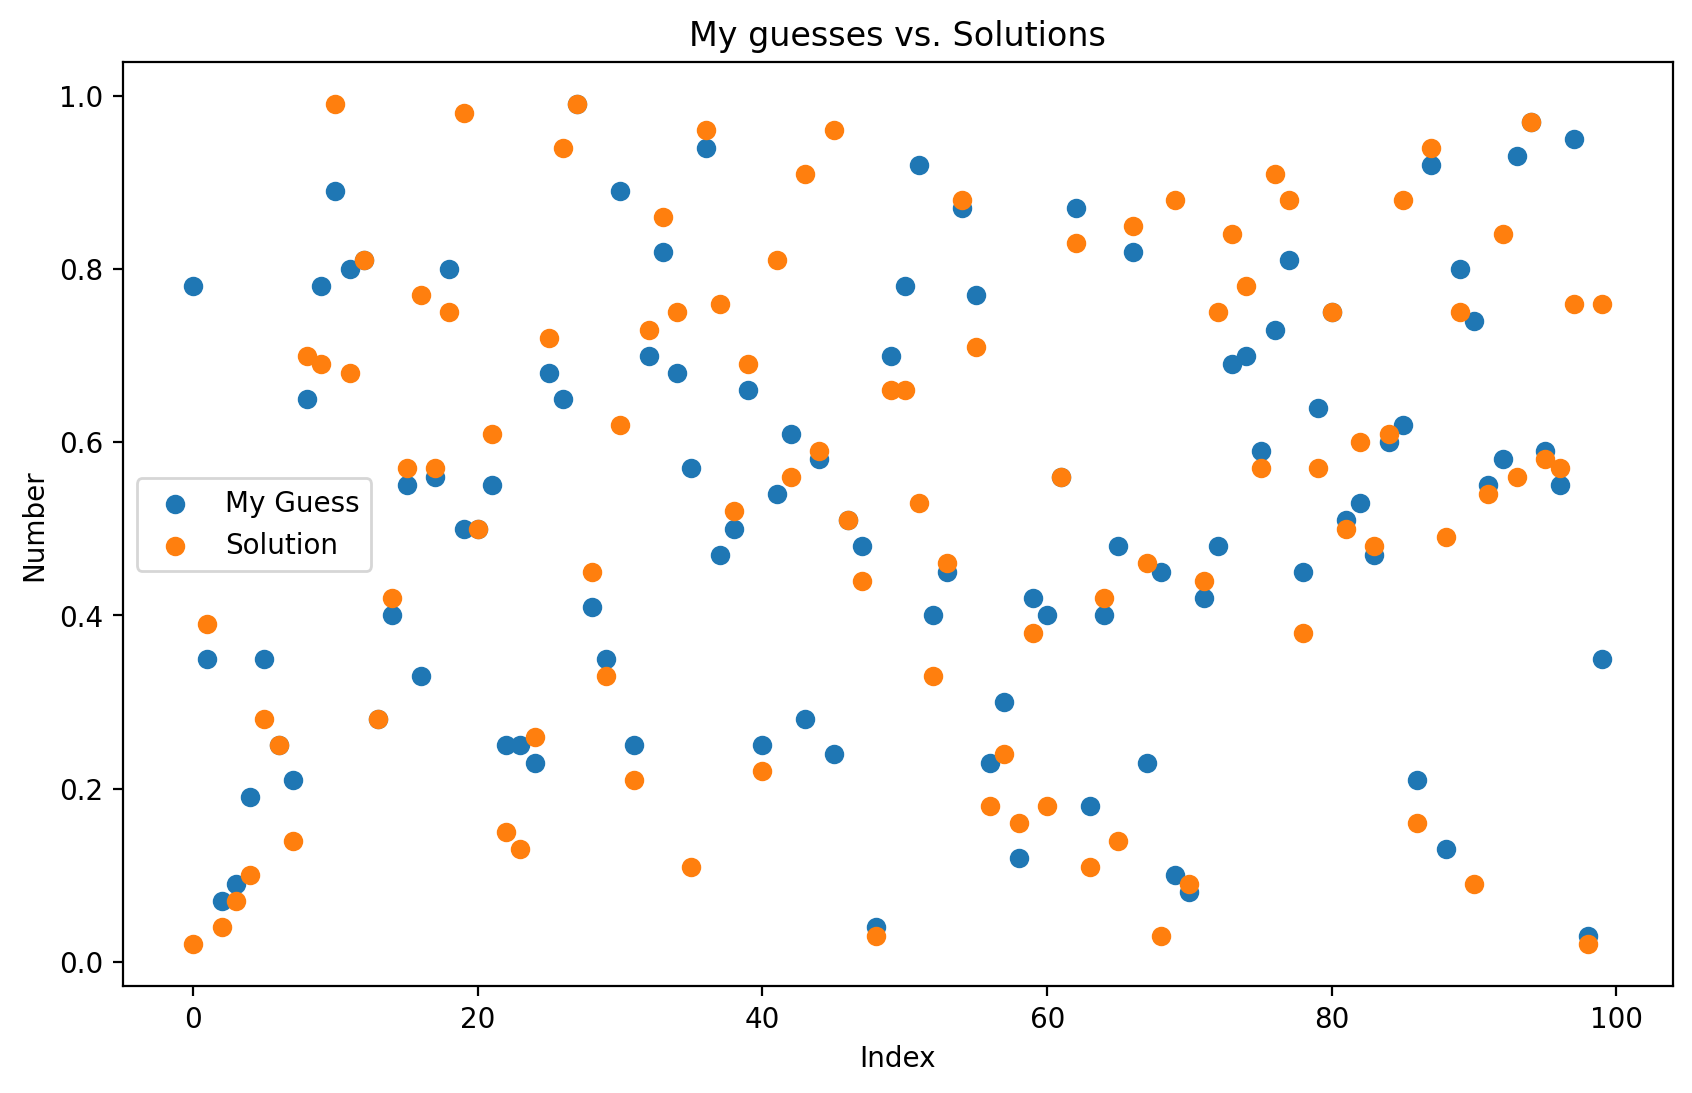

In [90]:
plt.figure(figsize=(10, 6)) 
plt.scatter(x, mydata, label='My Guess')
plt.scatter(x, solutions, label='Solution')
plt.xlabel('Index')
plt.ylabel('Number')
plt.title('My guesses vs. Solutions')
plt.legend()
plt.show()

Had we guessed perfectly, we would only see 100 points because our guesses would be overlapping on top of the solutions. In our case, we see a lot of overlapping points, and I would consider it ideal.

Plot the difference between your data and the solution. (Taking the difference requires only one line of code.) The X values should be the index of the data point from 0 to 99. Add a thin line that marks zero deviation. Print the values of the most positive and most negative deviation. Please briefly explain these extreme discrepancies.

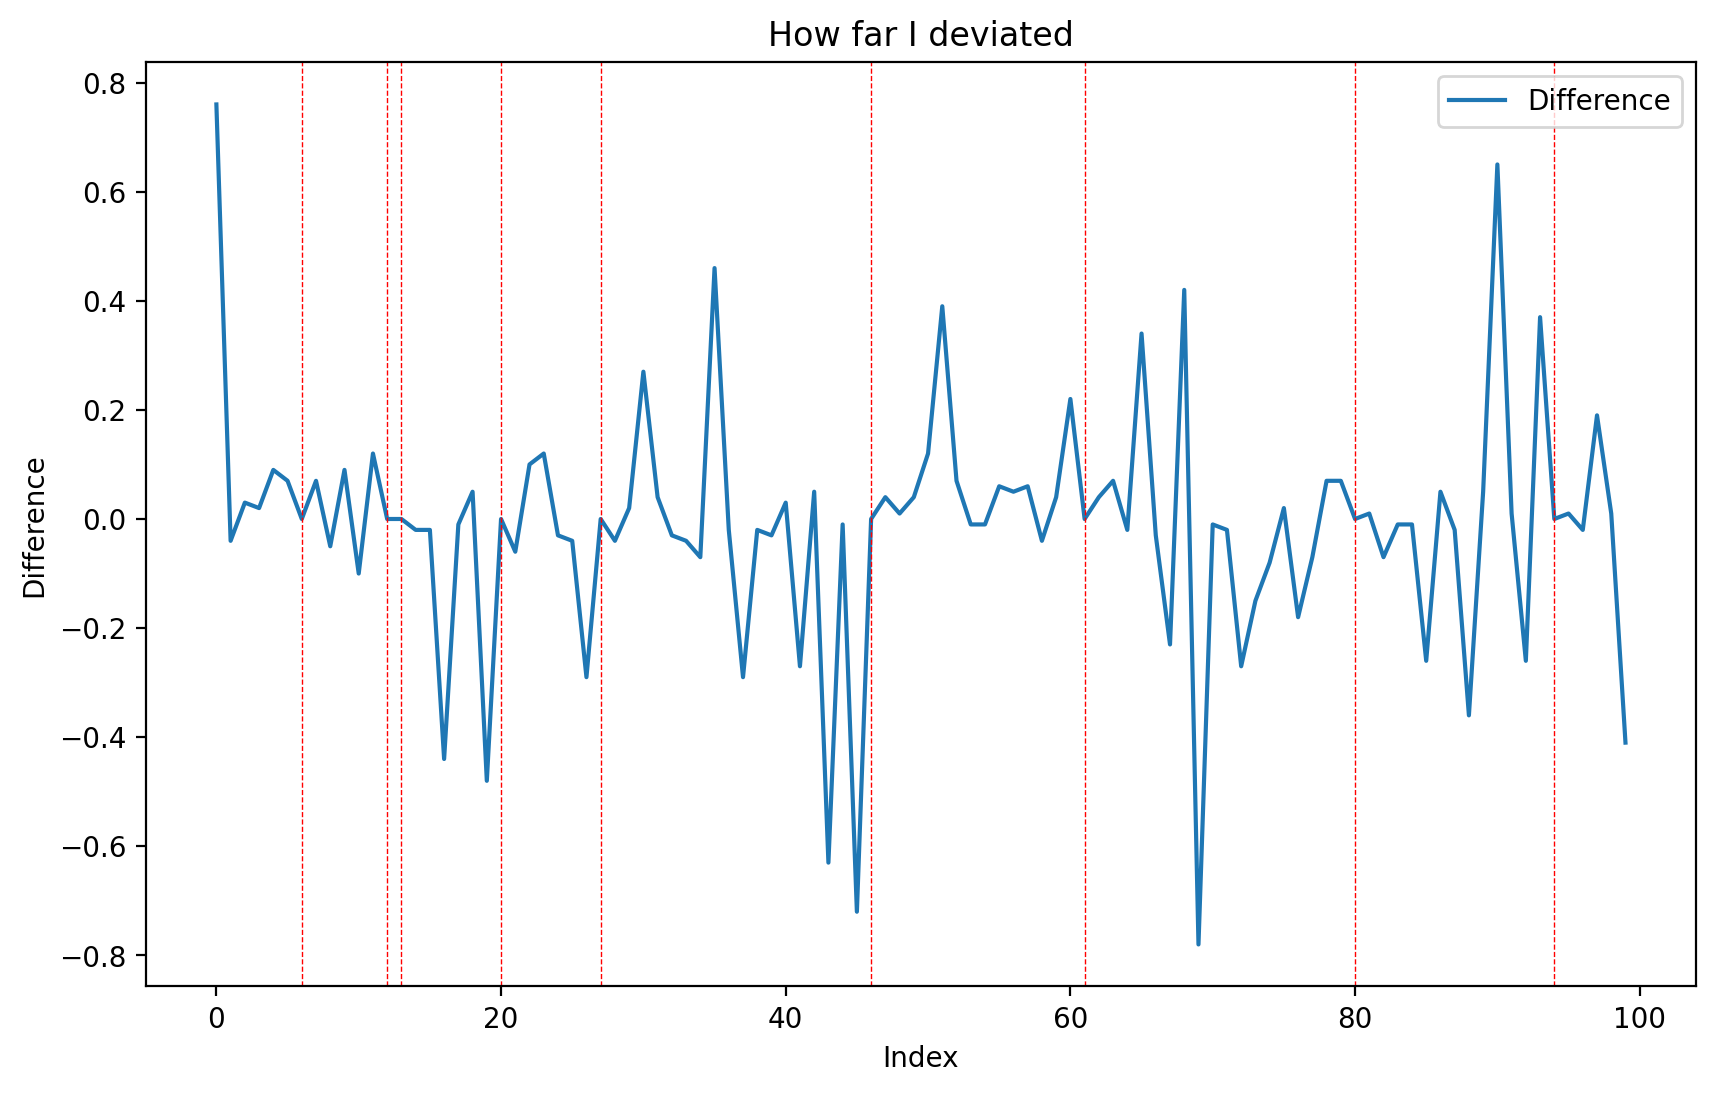

In [91]:
x = np.array(range(nNumbers))

plt.figure(figsize=(10, 6)) 
plt.plot(x, mydata - solutions, label='Difference')

zero_indices = np.where(mydata - solutions == 0)[0]

# Draw thin vertical lines at those indices
for idx in zero_indices:
    plt.axvline(x=idx, color='red', linestyle='--', linewidth=0.5)

plt.xlabel('Index')
plt.ylabel('Difference')
plt.title('How far I deviated')
plt.legend()
plt.show()


In [92]:
difference = mydata - solutions
sorted_diff = np.sort(difference)

print("Smallest 3:", sorted_diff[:3])
print("Largest 3:", sorted_diff[-3:])

Smallest 3: [-0.78 -0.72 -0.63]
Largest 3: [0.46 0.65 0.76]


Compute the average of the difference between your data and the solution. Include the sign of the difference in the summation. Then write a comment on the sign of the average.

In [93]:
np.average(difference)

-0.01199999999999999

The average is negative, meaning that on average, our guesses are slightly overestimating. However, it's also extremely close to 0 meaning that our guesses are fairly accurate.

Compute and print the variance and the standard deviation sigma between your data set and the solution as described on the lecture notes. 

In [94]:
variance = np.sum(difference**2)/(nNumbers - 1)
std = np.sqrt(variance)

print("Variance:", variance)
print("Std Dev:", std)

Variance: 0.04985050505050504
Std Dev: 0.22327226663986963


Let us assume we know the average is zero. Let us recalculate the variance and the standard deviation. [Where you divided by (nNumbers-1), you now need to divide by nNumbers.]

In [95]:
variance = np.sum(difference**2)/nNumbers
std = np.sqrt(variance)

print("Variance:", variance)
print("Std Dev:", std)

Variance: 0.04935199999999999
Std Dev: 0.22215310036098976


Let us assume you have stored the differences between your guesses and the solutions in a vector 'diff'. With the command 'plt.hist(diff, 10)' generate a probability distribution of a histogram of these differences. Adjust the number of bins, 10, until your are happy with the curve.

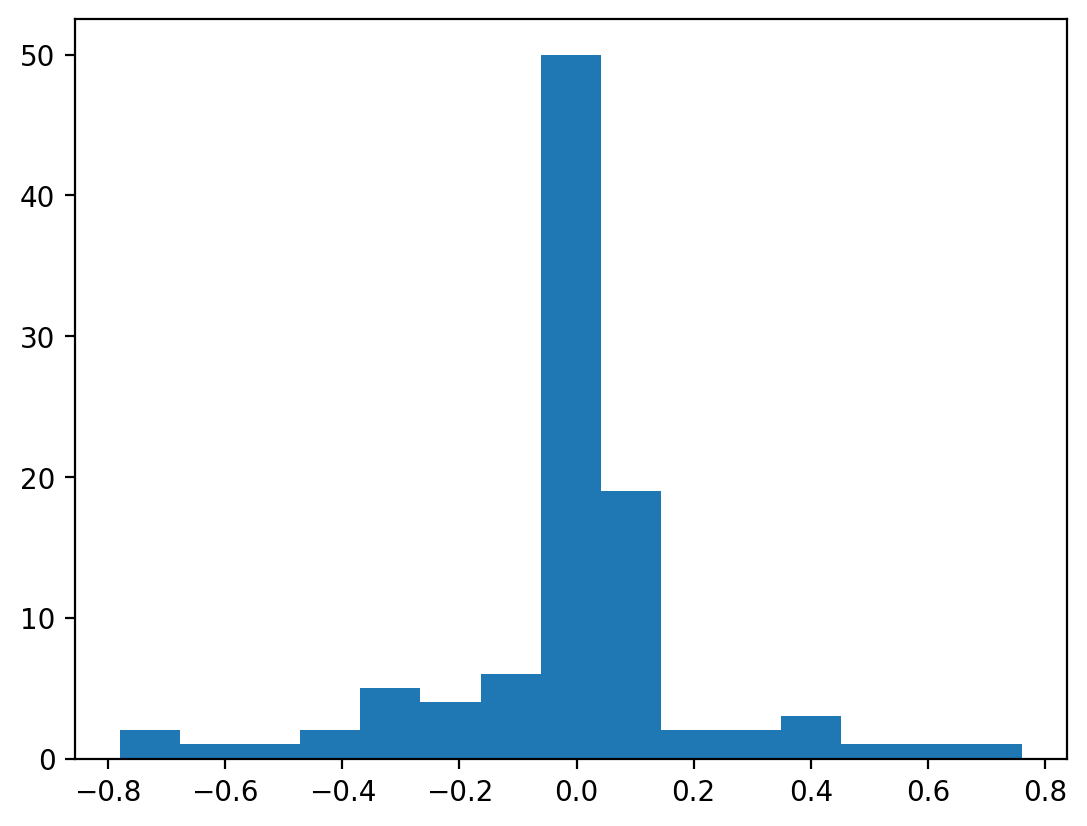

In [96]:
plt.hist(difference, bins=15)
plt.show()

Now pad yourself on the back because you are finished with the 1st of 3 parts. 